### TSF PROJECT 1 - Simple Linear Regression

In this regression task, I was required to predict the percentage marks that a Student is expected to score based upon the numbers of hours they studied.
This task basically consists of two variables.

In [1]:
# Importing Librabries to be used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn import metrics

In [2]:
# Reading and Importing the dataset from the link

url ="http://bit.ly/w-data"
student_data = pd.read_csv(url)

In [3]:
# Checking the imported dataset

student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Checking the shape (row and columns) of the dataset

student_data.shape

(25, 2)

In [5]:


student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Checking for relationship using correlation

np.corrcoef(student_data["Hours"], student_data["Scores"])

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

A Correlation of 0.98 shows that there is a strong relationship between the hours and the scores of the students

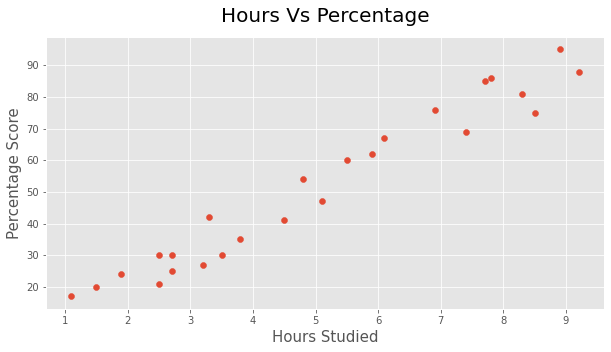

In [7]:
# Plotting the Scores distribution of students

x_axis = student_data[["Hours"]]
y_axis = student_data[["Scores"]]

plt.figure(figsize = (10, 5))
plt.scatter(x_axis, y_axis)
plt.title("Hours Vs Percentage", fontsize = 20, pad = 15)
plt.xlabel("Hours Studied", size = 15)
plt.ylabel("Percentage Score", size = 15)
plt.show()

From the graph above, it can also be seen that there is a strong and positive relationship between the hours studied and percentage of Score.

### Preparing the data for the Model

In [8]:
# Dividing the dataset into features(x) and target(y)

x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [9]:
# Spitting the data into test and train sets

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 0)

### Training the Model

In [10]:
# Inializing and training the algorithm

regl = LR()
regl.fit(x_train, y_train)

LinearRegression()

In [11]:
regl.coef_

array([10.13914413])

In [12]:
regl.intercept_

-2.012601732738254

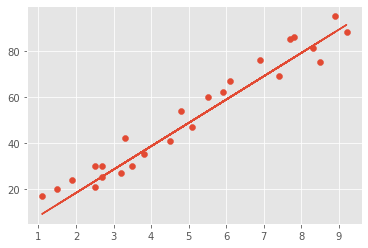

In [13]:
# Plotting the regression line

reg_line = regl.coef_*x+regl.intercept_
plt.scatter(x, y)
plt.plot(x, reg_line);
plt.show()

### Predictions

In [14]:
# Making predictions

y_predicted = regl.predict(x_test)
y_predicted

array([13.19611447, 30.43265949, 73.01706485, 23.3352586 , 57.80834865,
       36.51614597, 17.25177212, 77.0727225 , 67.94749278,  9.14045681,
       49.69703334, 76.05880809, 31.4465739 , 82.14229457, 91.26752428,
       59.83617747, 33.47440273, 25.36308742, 53.752691  , 25.36308742])

In [15]:
# Comparison of the actual and predicted values

s_compare = pd.DataFrame({"Actual Scores" : y_test, "Predicted Scores" : y_predicted})
s_compare

,Actual Scores,Predicted Scores
0,20,13.196114
1,27,30.432659
2,69,73.017065
3,30,23.335259
4,62,57.808349
5,35,36.516146
6,24,17.251772
7,86,77.072722
8,76,67.947493
9,17,9.140457


In [16]:
# Making prediction with my own data

hours = 9.25
own_data = regl.predict(np.array([9.25]).reshape(-1, 1))
print("hour = {}".format(hours))
print("Predicted Score = {}".format(own_data[0]))

hour = 9.25
Predicted Score = 91.77448149120502


### Model's Accuracy

In [17]:
# Evaluating the Model's accuracy using the mean squared error

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_predicted))

Mean Absolute Error: 5.335035442373328
